## Dominant Color Extraction for Image Segmentation
- Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Color Using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to Segementation

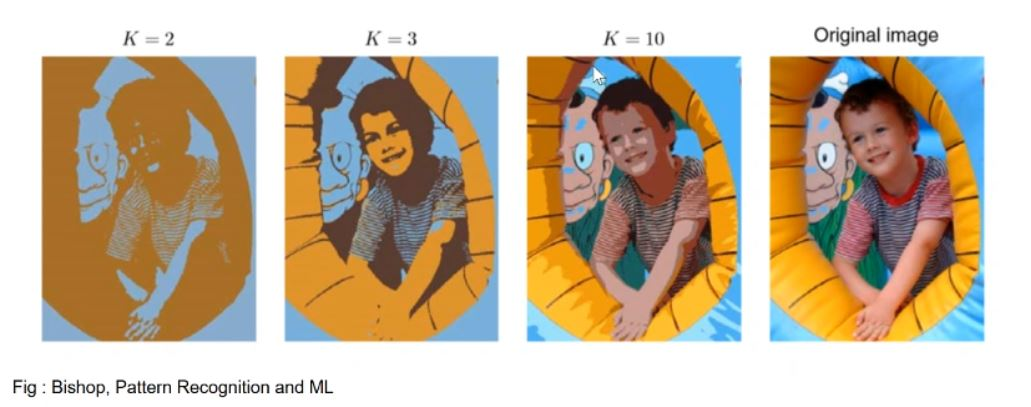

**First we will try find K colors which are most dominating Color**

In [1]:
import cv2 as cv

In [2]:
img = cv.imread('elephant.jpg') # reads image into BGR format
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [3]:
img.shape

(480, 640, 3)

In [4]:
import matplotlib.pyplot as plt

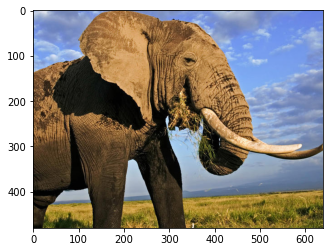

In [5]:
plt.imshow(img) # displays in RBG format wihtout cv.COLOR_BGR2RGB
original_shape = img.shape
plt.show()

In [6]:
# Flatten Each channel of the image

In [7]:
all_pixel = img.reshape((-1,3))

In [8]:
all_pixel.shape

(307200, 3)

In [9]:
from sklearn.cluster import KMeans

In [10]:
dominant_colors = 8
km = KMeans(n_clusters = dominant_colors)

In [11]:
km.fit(all_pixel)

KMeans()

In [12]:
centers = km.cluster_centers_ # fives four most dominanting color in RGB values
centers

array([[117.0661879 ,  88.48432243,  41.48763041],
       [115.80134039, 133.82844377, 168.72876901],
       [ 17.14532551,  15.91110235,  10.05944291],
       [166.54421564, 184.88648355, 209.71676667],
       [ 64.43836056,  49.72672913,  27.14247749],
       [125.43807154, 155.77397814, 222.25768789],
       [206.51173752, 159.45828012,  98.52493462],
       [165.26045101, 125.46509109,  61.9040697 ]])

In [13]:
import numpy as np

In [14]:
centers = np.array(centers, 'uint8') #uint8 is Necessary
centers

array([[117,  88,  41],
       [115, 133, 168],
       [ 17,  15,  10],
       [166, 184, 209],
       [ 64,  49,  27],
       [125, 155, 222],
       [206, 159,  98],
       [165, 125,  61]], dtype=uint8)

**PLOTTING THIS COLORS**

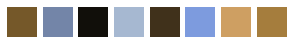

In [15]:
i = 1
plt.figure(0, figsize = (5,5))
colors = list()
for each_col in centers:
    plt.subplot(1,8,i)
    plt.axis(False) # turn off grid
    i+=1
    colors.append(each_col)
    a = np.zeros((100,100,3), 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

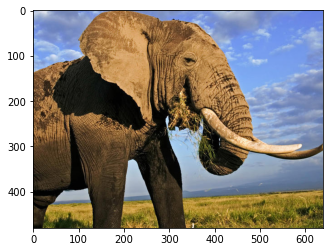

In [16]:
plt.imshow(img)
plt.show()

### Segmenting Our Original Image

In [17]:
new_img = np.zeros((480*640, 3), 'uint8')
new_img.shape

(307200, 3)

In [18]:
colors

[array([117,  88,  41], dtype=uint8),
 array([115, 133, 168], dtype=uint8),
 array([17, 15, 10], dtype=uint8),
 array([166, 184, 209], dtype=uint8),
 array([64, 49, 27], dtype=uint8),
 array([125, 155, 222], dtype=uint8),
 array([206, 159,  98], dtype=uint8),
 array([165, 125,  61], dtype=uint8)]

In [19]:
km.labels_

array([3, 3, 3, ..., 4, 4, 4])

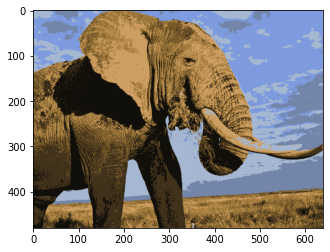

In [20]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)

plt.show()

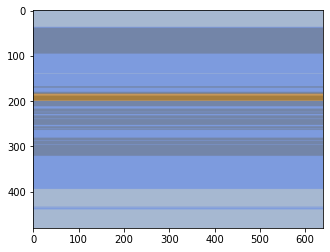

In [21]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[km.labels_[i]]
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()
    
    





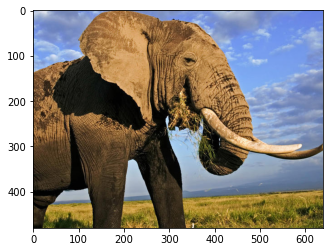

In [22]:
plt.imshow(img)
plt.show()